In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [55]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("calpella"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all
Train Basin File Exists: True


Run regular LSTM:

In [56]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":32
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [57]:
lstmNoPhysics.train()

2024-12-02 15:25:17,762: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_152517/output.log initialized.
2024-12-02 15:25:17,767: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_152517
2024-12-02 15:25:17,770: ### Run configurations for testing_run
2024-12-02 15:25:17,772: experiment_name: testing_run
2024-12-02 15:25:17,780: train_basin_file: calpella
2024-12-02 15:25:17,783: validation_basin_file: calpella
2024-12-02 15:25:17,785: test_basin_file: calpella
2024-12-02 15:25:17,789: train_start_date: 1994-10-01 00:00:00
2024-12-02 15:25:17,790: train_end_date: 2002-09-30 00:00:00
2024-12-02 15:25:17,792: validation_start_date: 2002-10-01 00:00:00
2024-12-02 15:25:17,794: validation_end_date: 2005-09-30 00:00:00
2024-12-02 15:25:17,796: test_start_date: 2005-10-01 00:00:00
2024-12-02 15:25:17,798: test_end_date: 2009-09-30 00:00:00
2024-12-02 15:25:17,801: device: cpu


Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


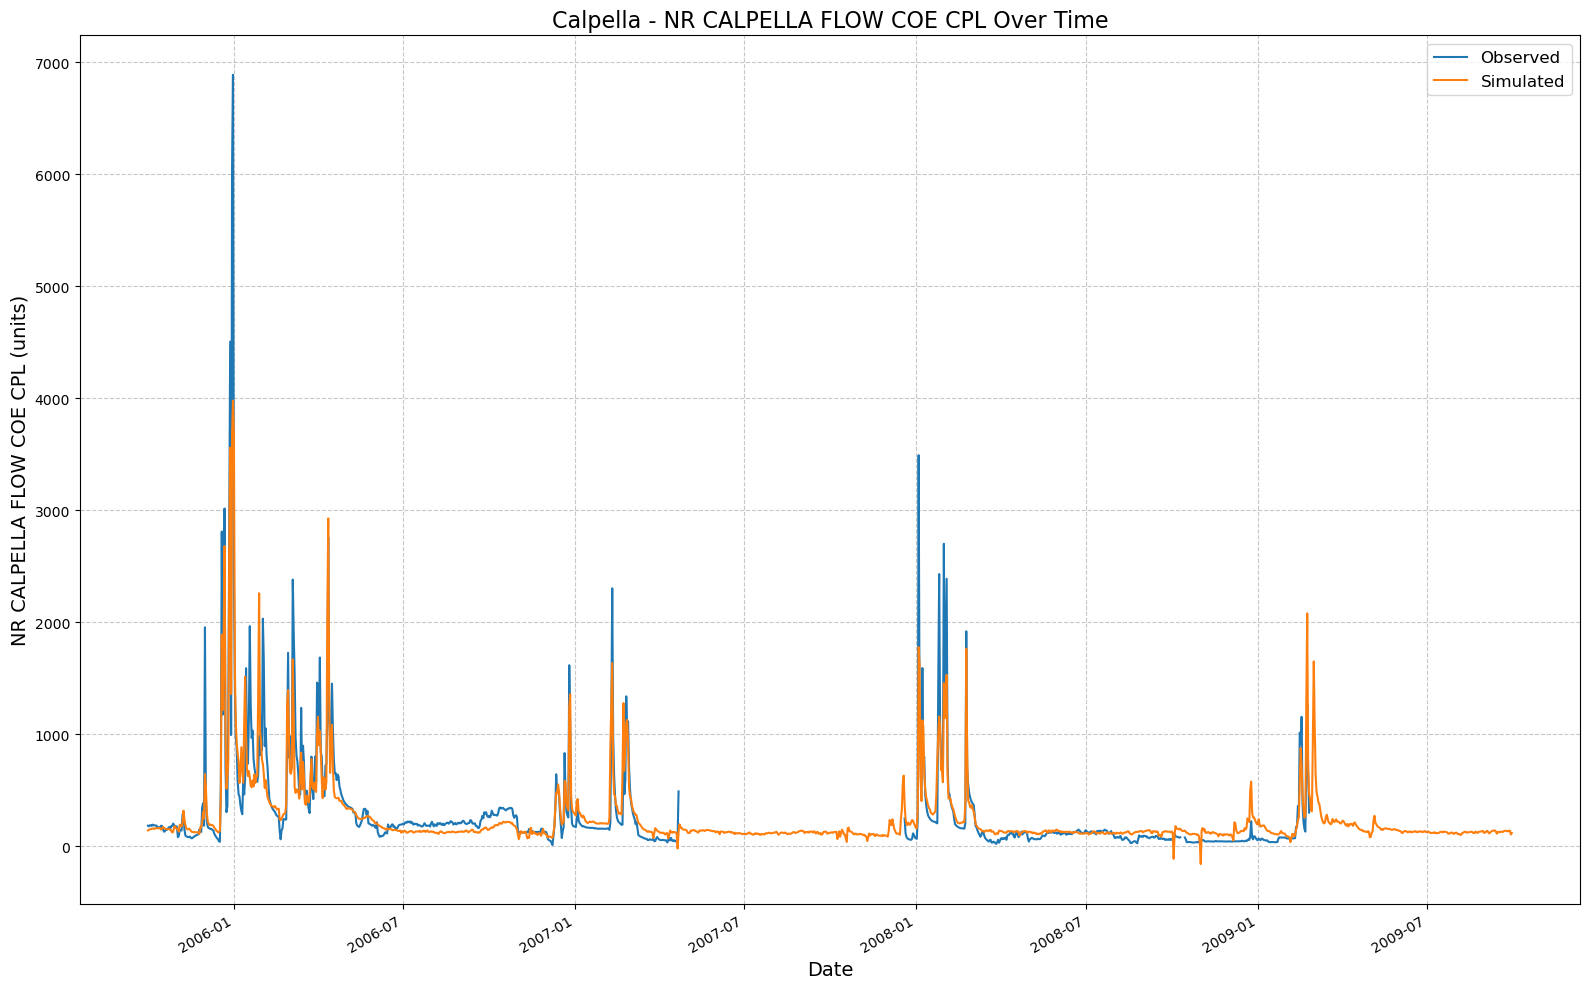

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_152517/results_output.csv


{'NSE': 0.79273322224617,
 'MSE': 52786.65234375,
 'RMSE': 229.7534599168204,
 'KGE': 0.7500679874741245,
 'Alpha-NSE': 0.7713878860148062,
 'Beta-KGE': 0.989356517791748,
 'Beta-NSE': -0.0062525401927199355,
 'Pearson-r': 0.8995548482457326,
 'FHV': -20.879080891609192,
 'FMS': -23.210416816863567,
 'FLV': -1015.4644542071158,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 36.86864376068115}

In [58]:
lstmNoPhysics.results()

Now run physics informes lstm with HMS data:

In [61]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("/Users/mia/research/calpella_data_folder/new_calpella.csv")
params = {
    "epochs":32
}
features_with_physics = [
    #from daily
    #"EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW calpella - calibration',
    'EF Russian 20 ET-POTENTIAL calpella - calibration',
    'EF Russian 20 FLOW calpella - calibration',
    'EF Russian 20 FLOW-BASE calpella - calibration',
    'EF Russian 20 INFILTRATION calpella - calibration',
    'EF Russian 20 PERC-SOIL calpella - calibration',
    'EF Russian 20 SATURATION FRACTION calpella - calibration',
]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [62]:
lstmPhysics.train()

2024-12-02 15:43:56,334: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_154356/output.log initialized.
2024-12-02 15:43:56,347: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_154356
2024-12-02 15:43:56,351: ### Run configurations for testing_run
2024-12-02 15:43:56,361: experiment_name: testing_run
2024-12-02 15:43:56,364: train_basin_file: calpella
2024-12-02 15:43:56,365: validation_basin_file: calpella
2024-12-02 15:43:56,368: test_basin_file: calpella
2024-12-02 15:43:56,370: train_start_date: 1994-10-01 00:00:00
2024-12-02 15:43:56,372: train_end_date: 2002-09-30 00:00:00
2024-12-02 15:43:56,380: validation_start_date: 2002-10-01 00:00:00
2024-12-02 15:43:56,382: validation_end_date: 2005-09-30 00:00:00
2024-12-02 15:43:56,383: test_start_date: 2005-10-01 00:00:00
2024-12-02 15:43:56,386: test_end_date: 2009-09-30 00:00:00
2024-12-02 15:43:56,388: device: cpu


2024-12-02 15:43:56,400: metrics: ['NSE', 'MSE']
2024-12-02 15:43:56,402: model: cudalstm
2024-12-02 15:43:56,415: head: regression
2024-12-02 15:43:56,418: output_activation: linear
2024-12-02 15:43:56,420: hidden_size: 64
2024-12-02 15:43:56,422: initial_forget_bias: 3
2024-12-02 15:43:56,427: output_dropout: 0.5
2024-12-02 15:43:56,429: optimizer: Adam
2024-12-02 15:43:56,433: loss: NSE
2024-12-02 15:43:56,436: learning_rate: {0: 0.01, 30: 0.005, 40: 0.001}
2024-12-02 15:43:56,438: batch_size: 256
2024-12-02 15:43:56,441: epochs: 32
2024-12-02 15:43:56,448: clip_gradient_norm: 1
2024-12-02 15:43:56,462: predict_last_n: 1
2024-12-02 15:43:56,469: seq_length: 365
2024-12-02 15:43:56,473: log_interval: 16
2024-12-02 15:43:56,483: log_tensorboard: True
2024-12-02 15:43:56,611: log_n_figures: 1
2024-12-02 15:43:56,614: save_weights_every: 32
2024-12-02 15:43:56,616: dataset: russian_river
2024-12-02 15:43:56,619: data_dir: /Users/mia/research/russian_river_data_folder
2024-12-02 15:43:56

ValueError: Cannot infer a legal frequency from dataset: None.

Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


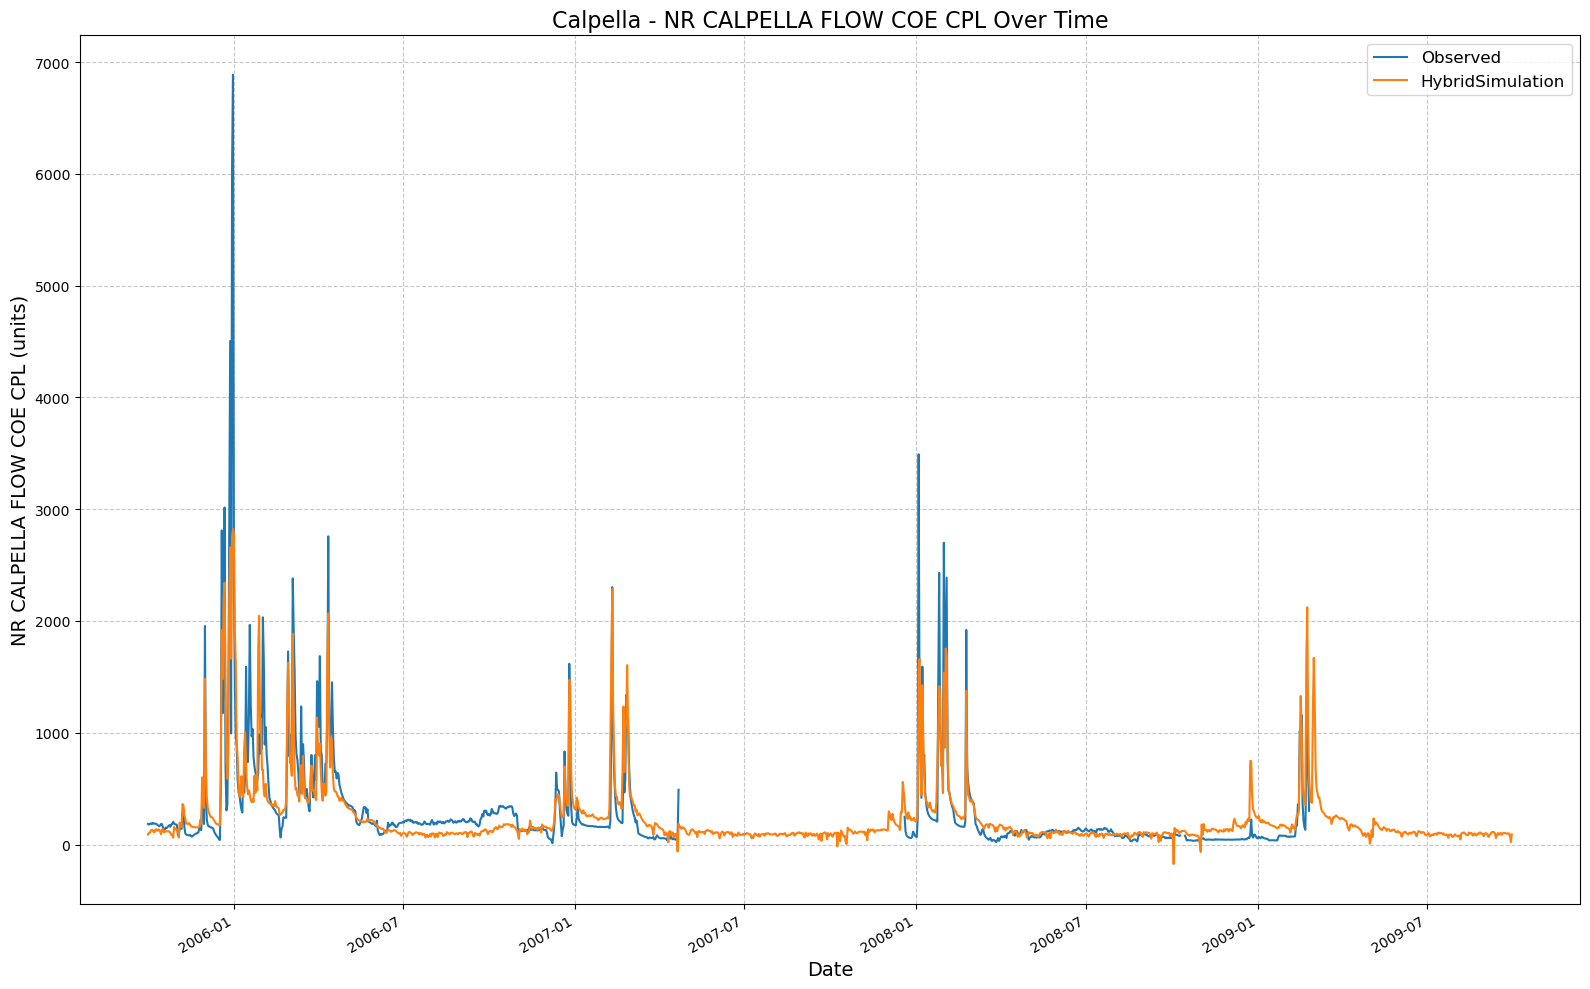

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_165156/results_output.csv


{'NSE': 0.7097806930541992,
 'MSE': 73912.984375,
 'RMSE': 271.8694252302013,
 'KGE': 0.6926228456298094,
 'Alpha-NSE': 0.7319530891373996,
 'Beta-KGE': 0.979782223701477,
 'Beta-NSE': -0.011876960003783115,
 'Pearson-r': 0.8509268296195586,
 'FHV': -28.088223934173584,
 'FMS': -7.996105169870976,
 'FLV': -1001.4865092892298,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 42.93561935424805}

In [5]:
lstmPhysics.results()

Comparison to results from physicsLSTM : The following cells test the physics informed for the validation period, the way evan did in the testing_notebook

In [10]:
run_dir = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_134216')
eval_run(run_dir=run_dir, period="test")

2024-11-30 13:47:18,388: Using the model weights from /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_134216/model_epoch032.pt
# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
2024-11-30 13:47:19,417: Stored metrics at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_134216/test/model_epoch032/test_metrics.csv
2024-11-30 13:47:19,430: Stored results at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_134216/test/model_epoch032/test_results.p


In [11]:
with open(run_dir / "test" / "model_epoch032" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results['Calpella']['1D']['xr']

<xarray.Dataset>
Dimensions:                       (date: 1461, time_step: 1)
Coordinates:
  * date                          (date) datetime64[ns] 2005-10-01 ... 2009-0...
  * time_step                     (time_step) int64 0
Data variables:
    NR CALPELLA FLOW COE CPL_obs  (date, time_step) float32 184.2 178.0 ... nan
    NR CALPELLA FLOW COE CPL_sim  (date, time_step) float32 nan nan ... 94.18

Text(0.5, 1.0, 'Calpella Gage Validation period - NSE 0.724')

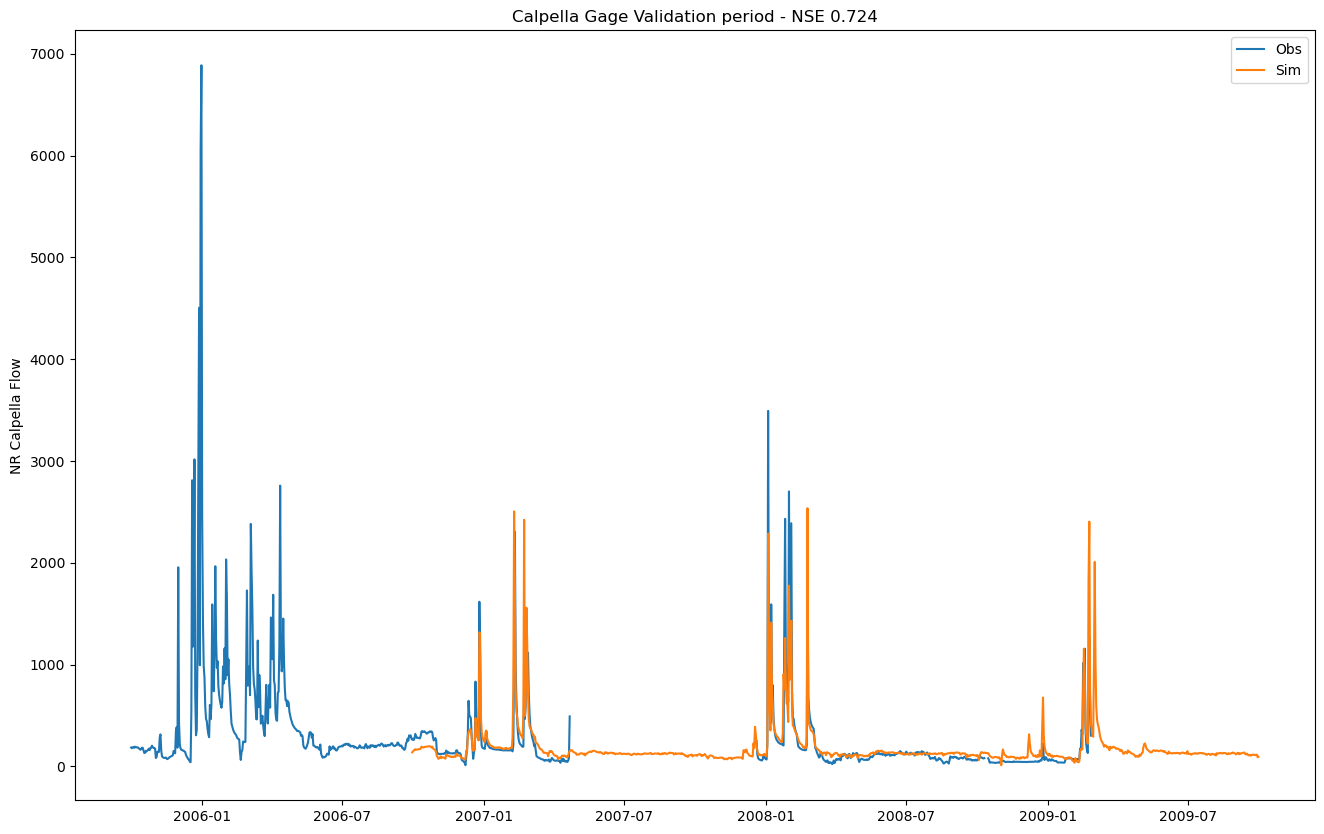

In [12]:

# extract observations and LSTM simulations
qobs = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_obs']
qsim = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs["date"], qobs, label="Obs")
ax.plot(qsim["date"], qsim, label="Sim")
ax.set_ylabel("NR Calpella Flow")
ax.legend()
ax.set_title(f"Calpella Gage Validation period - NSE {results['Calpella']['1D']['NSE']:.3f}")

The following function combines the the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period. (Also computes NSE for HMS model and recomputes NSE for LSTMS including setting all negative values to 0.)

In [35]:
import xarray as xr

In [45]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the capella.csv thy gave us
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[2:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # # print nse for each model
    # print("The metrics for HMS is:", calculate_all_metrics(xr.DataArray(df['Observed_Model1'], dims=["time"]), xr.DataArray(df['HMS_predicted'], dims=["time"])))
    # print("The metrics for pure LSTM is:", calculate_all_metrics(df['Observed_Model1'], df['Predicted_Model1']))
    # print("The metrics for Physics Informed LSTM is:", calculate_all_metrics(df['Observed_Model2'], df['Predicted_Model2']))
    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "calpella_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Pass xarray DataArrays with coordinates to calculate_all_metrics
    print("The metrics for HMS is:", calculate_all_metrics(obs_da, sim_da_hms))
    print("The metrics for pure LSTM is:", calculate_all_metrics(obs_da, sim_da_lstm))
    print("The metrics for Physics Informed LSTM is:", calculate_all_metrics(obs_da, sim_da_physics))

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2) #color="blue",
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.8) #color="purple",
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.7) #color="orange",
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.7) #color="lightblue",

    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

The metrics for HMS is: {'NSE': 0.6991856462431243, 'MSE': 76611.32693337982, 'RMSE': 276.7875122424779, 'KGE': 0.7464235588689607, 'Alpha-NSE': 1.2247040420987712, 'Beta-KGE': 1.0588589896090026, 'Beta-NSE': 0.034576824144029315, 'Pearson-r': 0.8982909821925092, 'FHV': 25.593777649265498, 'FMS': 0.5941711431321225, 'FLV': -967.6060445823159, 'Peak-Timing': 0.0, 'Peak-MAPE': 54.23447477600877}
The metrics for pure LSTM is: {'NSE': 0.774332879761162, 'MSE': 57472.84765774507, 'RMSE': 239.73495293291103, 'KGE': 0.6757194379415236, 'Alpha-NSE': 0.7125263736051678, 'Beta-KGE': 0.8856809704167595, 'Beta-NSE': -0.06715692893258905, 'Pearson-r': 0.9027994005599143, 'FHV': -25.316820701498504, 'FMS': -32.85975802248281, 'FLV': -1009.3199178188456, 'Peak-Timing': 0.25, 'Peak-MAPE': 39.163540527474694}
The metrics for Physics Informed LSTM is: {'NSE': 0.724423990658539, 'MSE': 28870.32238977765, 'RMSE': 169.91269049066833, 'KGE': 0.8082721433613294, 'Alpha-NSE': 0.9103762373625437, 'Beta-KGE': 1

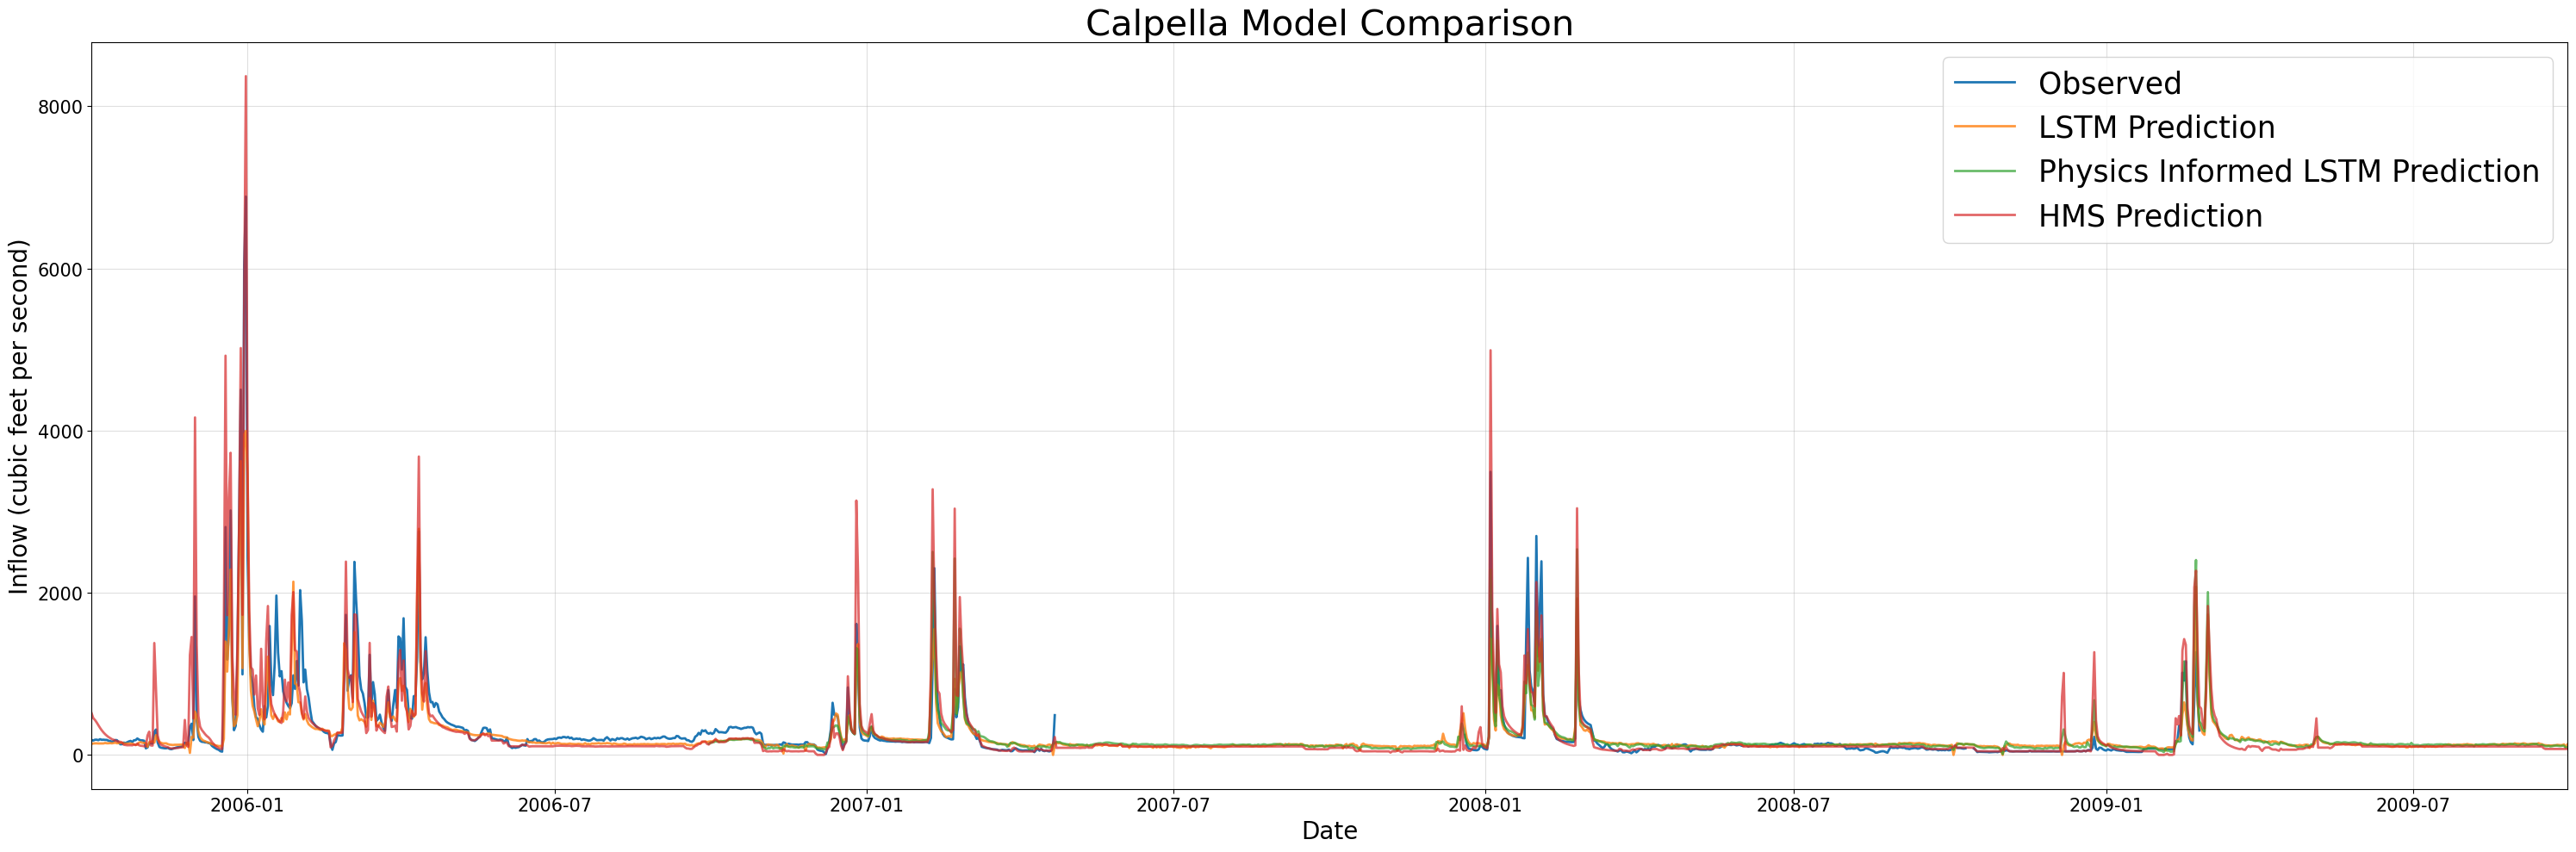

In [46]:
lstm_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_133451/results_output.csv')
physics_informed_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_134216/results_output.csv')
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/calpella.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Calpella Model Comparison')

In [17]:
import plotly.graph_objects as go

def combinedPlotFancy(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    # Load and preprocess Model 1 (LSTM)
    model1_df = pd.read_csv(lstm_results)  # Columns: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Load and preprocess Model 2 (Physics-Informed LSTM)
    model2_df = pd.read_csv(lstmPhysics_results)  # Columns: Date, Observed, Predicted
    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Load and preprocess HMS results
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[2:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0, 1]]  # Keep only Date and HMS_predicted columns
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    # Merge dataframes
    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime(test_start_date, format='%d/%m/%Y')
    test_end_date = pd.to_datetime(test_end_date, format='%d/%m/%Y')
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Create Plotly figure
    fig = go.Figure()

    # Add traces for each model
    fig.add_trace(go.Scatter(x=df["date"], y=df["Observed_Model1"], mode='lines',
                             name='Observed', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df["date"], y=df["Predicted_Model1"], mode='lines',
                             name='LSTM Prediction', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df["date"], y=df["Predicted_Model2"], mode='lines',
                             name='Physics-Informed LSTM Prediction', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df["date"], y=df["HMS_predicted"], mode='lines',
                             name='HMS Prediction', line=dict(width=1.2)))

    # Customize layout
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Inflow (cubic feet per second)",
        template="seaborn",
        hovermode="x unified",
        xaxis=dict(
            rangeslider=dict(visible=True),  # Add range slider for zooming
            rangeselector=dict(
                buttons=[
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ]
            )
        )
    )

    # Zoom label formatting based on zoom level
    fig.update_xaxes(
        tickformatstops=[
            dict(dtickrange=[None, 1000], value="%Y-%m-%d"),
            dict(dtickrange=[1000, 86400000], value="%b %d, %Y"),
            dict(dtickrange=[86400000, "M1"], value="%b %Y"),
            dict(dtickrange=["M1", None], value="%Y"),
        ]
    )

    # Show plot
    fig.show()


In [18]:

combinedPlotFancy(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Calpella Basin Model Comparison')